---
title: Injective Networks Showcase
subtitle: Fitting shapes using Injective Networks
date: 2025-02-26
---

We now fit Injective Networks to some target shapes to get a sense of their representation power and
shortcomings.

In [1]:
# Basic imports
import torch
from torch import nn
import geosimilarity as gs
from NIGnets import NIGnet

from assets.utils import automate_training, plot_curves

We will now start using the [NIGnets](https://github.com/atharvaaalok/NIGnets) package for creating
networks instead of defining them again and again with additional features.

# Intersection Possible
We now fit Injective Networks to target curves when there are no additional constraints on the
network weight matrices and therefore, non-invertibility of weight matrices is possible during
optimization.

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    0.633713
Epoch: [ 200/1000]. Loss:    0.000025
Epoch: [ 400/1000]. Loss:    0.000011
Epoch: [ 600/1000]. Loss:    0.000008
Epoch: [ 800/1000]. Loss:    0.000006
Epoch: [1000/1000]. Loss:    0.000004
Training Square Net:
Epoch: [   1/1000]. Loss:    0.898328
Epoch: [ 200/1000]. Loss:    0.001820
Epoch: [ 400/1000]. Loss:    0.000804
Epoch: [ 600/1000]. Loss:    0.000731
Epoch: [ 800/1000]. Loss:    0.000710
Epoch: [1000/1000]. Loss:    0.000704


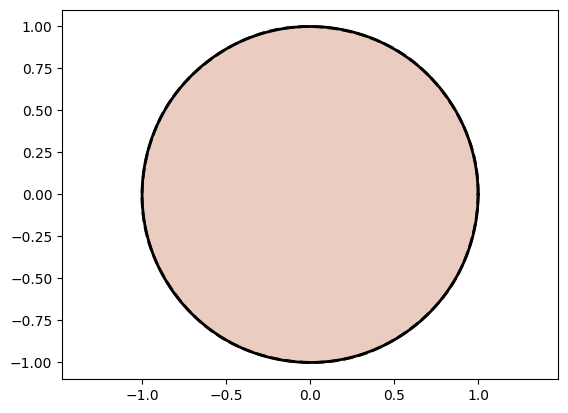

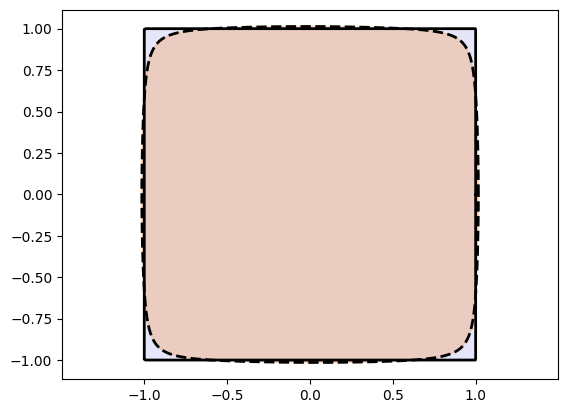

In [22]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
circle_net = NIGnet(layer_count = 3, act_fn = nn.Tanh)
square_net = NIGnet(layer_count = 3, act_fn = nn.Tanh)

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [   1/1000]. Loss:    0.386537
Epoch: [ 200/1000]. Loss:    0.017831
Epoch: [ 400/1000]. Loss:    0.005423
Epoch: [ 600/1000]. Loss:    0.004649
Epoch: [ 800/1000]. Loss:    0.004336
Epoch: [1000/1000]. Loss:    0.004233


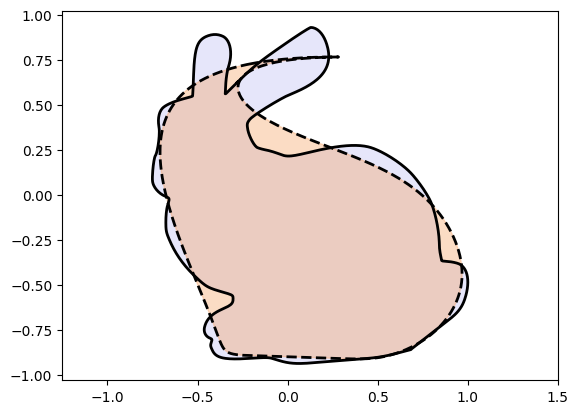

In [62]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_bunny = stanford_bunny(num_pts)

bunny_net = NIGnet(layer_count = 5, act_fn = nn.Tanh)

automate_training(
    model = bunny_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_bunny,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

Xc_bunny = bunny_net(t)
plot_curves(Xc_bunny, Xt_bunny)

## Airfoil

Epoch: [   1/1000]. Loss:    0.289349
Epoch: [ 200/1000]. Loss:    0.000710
Epoch: [ 400/1000]. Loss:    0.000083
Epoch: [ 600/1000]. Loss:    0.000057
Epoch: [ 800/1000]. Loss:    0.000046
Epoch: [1000/1000]. Loss:    0.000040


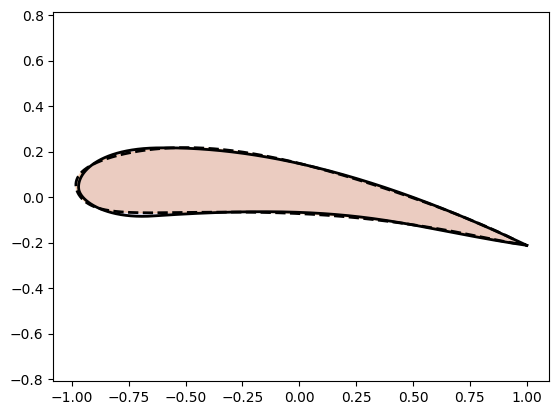

In [39]:
from assets.shapes import airfoil

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_airfoil = airfoil(num_pts)

airfoil_net = NIGnet(layer_count = 4, act_fn = nn.Tanh)

automate_training(
    model = airfoil_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_airfoil,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

Xc_airfoil = airfoil_net(t)
plot_curves(Xc_airfoil, Xt_airfoil)

# Intersection Impossible
We now fit Injective Networks to target curves when we first perform a matrix exponential of the
weight matrices and then use them for the linear transformations. Therefore, non-invertibility of
weight matrices is impossible during optimization.

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    0.365332
Epoch: [ 200/1000]. Loss:    0.001869
Epoch: [ 400/1000]. Loss:    0.000162
Epoch: [ 600/1000]. Loss:    0.002354
Epoch: [ 800/1000]. Loss:    0.000030
Epoch: [1000/1000]. Loss:    0.000030
Training Square Net:
Epoch: [   1/1000]. Loss:    0.495981
Epoch: [ 200/1000]. Loss:    0.000615
Epoch: [ 400/1000]. Loss:    0.000589
Epoch: [ 600/1000]. Loss:    0.000577
Epoch: [ 800/1000]. Loss:    0.000545
Epoch: [1000/1000]. Loss:    0.000708


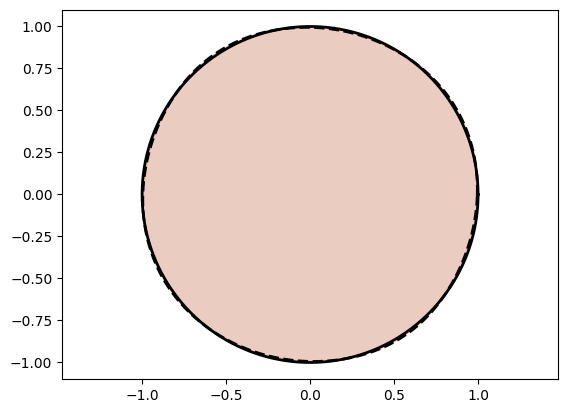

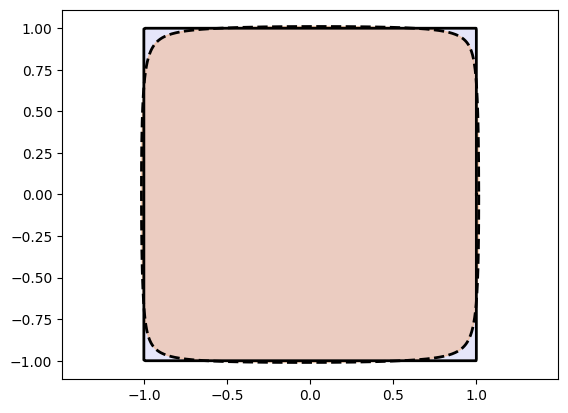

In [63]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
circle_net = NIGnet(layer_count = 3, act_fn = nn.Tanh, intersection = 'impossible')
square_net = NIGnet(layer_count = 3, act_fn = nn.Tanh, intersection = 'impossible')

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [   1/1000]. Loss:    1.172325
Epoch: [ 200/1000]. Loss:    0.029859
Epoch: [ 400/1000]. Loss:    0.030550
Epoch: [ 600/1000]. Loss:    0.020915
Epoch: [ 800/1000]. Loss:    0.022760
Epoch: [1000/1000]. Loss:    0.019492


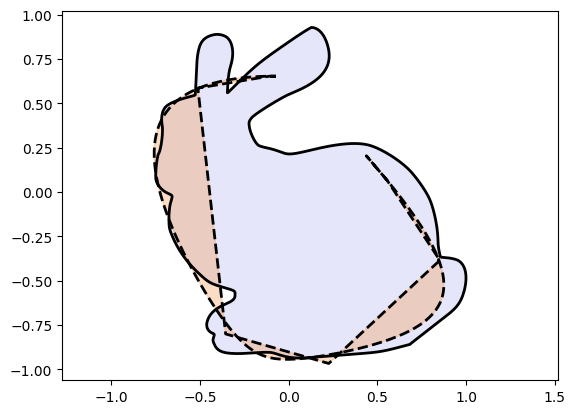

In [26]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_bunny = stanford_bunny(num_pts)

bunny_net = NIGnet(layer_count = 5, act_fn = nn.Tanh, intersection = 'impossible')

automate_training(
    model = bunny_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_bunny,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

Xc_bunny = bunny_net(t)
plot_curves(Xc_bunny, Xt_bunny)

Above we include a pathological fit to drive the following point:

:::{important} Crucial: Apparent Self-Intersection
It may seem from the above fit that the curve self-intersects even though we have specified
`intersection = 'impossible'`!
This is a discretization problem not a self-intersection problem. Below we generate more points on
the candidate curve to produce a more accurate representation of the curve represented by the
network and we observe that the curve is indeed a simple closed curve and the apparent
self-intersection was an artifact of coarse discretization.
:::

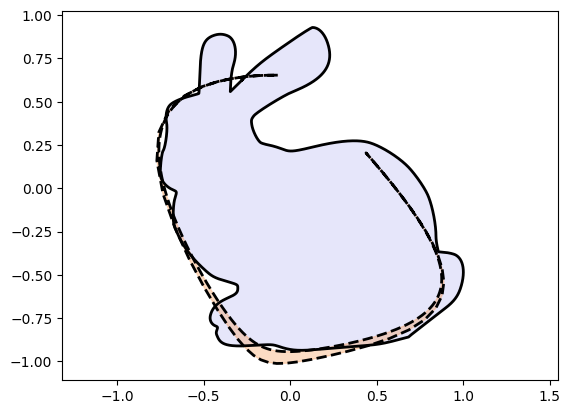

In [33]:
num_pts = 10000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_bunny = stanford_bunny(num_pts)

Xc_bunny = bunny_net(t)
plot_curves(Xc_bunny, Xt_bunny)

## Airfoil

Epoch: [   1/1000]. Loss:    0.104689
Epoch: [ 200/1000]. Loss:    0.001453
Epoch: [ 400/1000]. Loss:    0.000817
Epoch: [ 600/1000]. Loss:    0.000388
Epoch: [ 800/1000]. Loss:    0.000117
Epoch: [1000/1000]. Loss:    0.000094


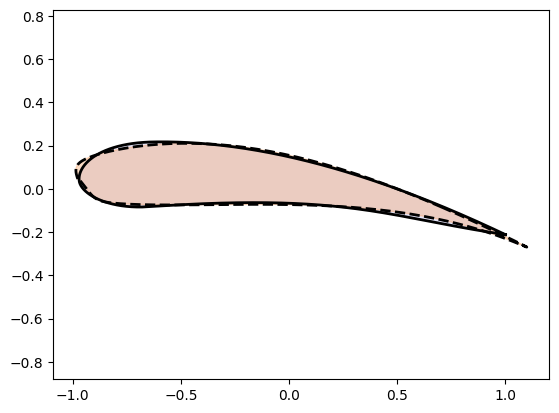

In [75]:
from assets.shapes import airfoil

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_airfoil = airfoil(num_pts)

airfoil_net = NIGnet(layer_count = 4, act_fn = nn.Tanh, intersection = 'impossible')

automate_training(
    model = airfoil_net, loss_fn = gs.USDFLoss(), X_train = t, Y_train = Xt_airfoil,
    learning_rate = 0.01, epochs = 1000, print_cost_every = 200
)

Xc_airfoil = airfoil_net(t)
plot_curves(Xc_airfoil, Xt_airfoil)